In [21]:
%matplotlib inline

In [22]:
from sklearn import datasets

In [23]:
digits = datasets.load_digits()

In [24]:
print (digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [25]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [26]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [36]:
# we can look at how the images are represented
# these are 1797 data samples of 8x8 images 
str(digits.images.shape)

'(1797, 8, 8)'

In [27]:
# First, we will follow the scikit tutorial and use an SVM classifier to create a classification model
# In scikit-learn, an estimator for classification is a Python object 
# that implements the methods fit(X, y) and predict(T).

In [28]:
from sklearn import svm
clf  = svm.SVC(gamma=0.001, C=100.)

In [29]:
# Intuitively, the gamma parameter defines how far the influence of a single training example reaches, 
# with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse 
# of the radius of influence of samples selected by the model as support vectors.
# The C parameter trades off misclassification of training examples against simplicity 
# of the decision surface. A low C makes the decision surface smooth, 
# while a high C aims at classifying all training examples correctly by giving the model 
# freedom to select more samples as support vectors.

In [30]:
clf.fit(digits.data[:-1], digits.target[:-1]) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [31]:
clf.predict(digits.data[-1:])

array([8])

In [32]:
digits.images[-1:]

array([[[  0.,   0.,  10.,  14.,   8.,   1.,   0.,   0.],
        [  0.,   2.,  16.,  14.,   6.,   1.,   0.,   0.],
        [  0.,   0.,  15.,  15.,   8.,  15.,   0.,   0.],
        [  0.,   0.,   5.,  16.,  16.,  10.,   0.,   0.],
        [  0.,   0.,  12.,  15.,  15.,  12.,   0.,   0.],
        [  0.,   4.,  16.,   6.,   4.,  16.,   6.,   0.],
        [  0.,   8.,  16.,  10.,   8.,  16.,   8.,   0.],
        [  0.,   1.,   8.,  12.,  14.,  12.,   1.,   0.]]])

In [33]:
# to visualize the image 

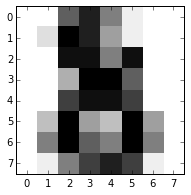

In [34]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [37]:
# we saw how images looked in an 8x8 grid
# what if we want to reshape them into a single vector? 
X = digits.data.reshape(-1, 64)
X.shape

(1797, 64)

In [38]:
# targets remain the same
y = digits.target
y.shape

(1797,)

In [39]:
print X

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [41]:
# say we want to reduce the number of dimensions we need to use to visualize the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2 dimensions
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [42]:
X_pca = pca.transform(X)
X_pca.shape

(1797, 2)

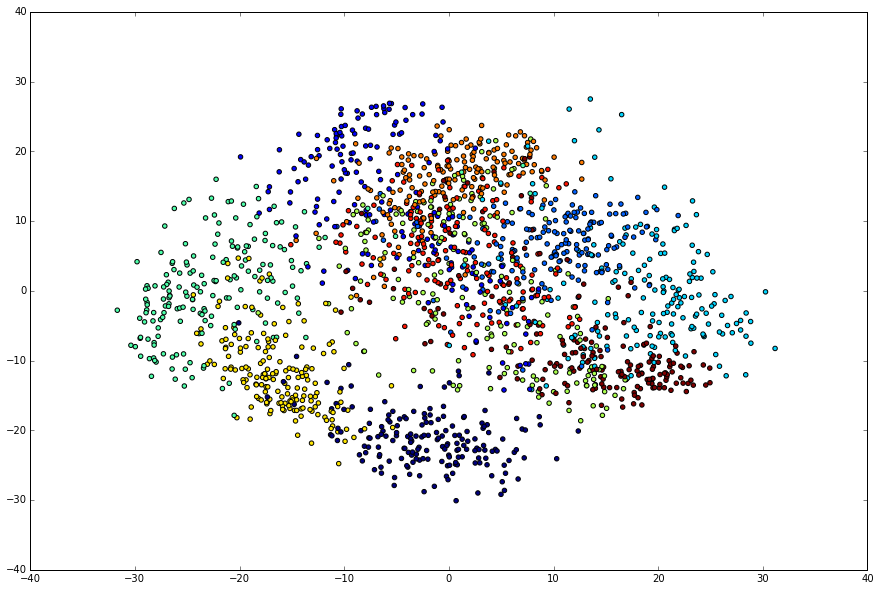

In [51]:
plt.figure(1, figsize=(15,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

In [58]:
# what is the average shape of samples? 
pca.mean_.shape

(64,)

In [55]:
pca.components_.shape

(2, 64)

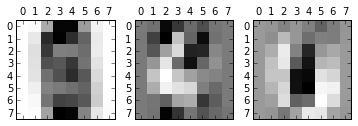

In [57]:
fix, ax = plt.subplots(1, 3)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0, :].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1, :].reshape(8, 8), cmap=plt.cm.Greys);

In [67]:
# what happens if we change dimensions? 
pca = PCA(n_components=4) # 4 dimensions
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(1797, 4)

In [68]:
pca.mean_.shape

(64,)

In [69]:
pca.components_.shape

(4, 64)

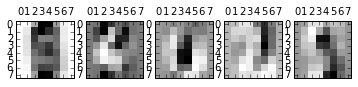

In [70]:
fix, ax = plt.subplots(1, 5)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0, :].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1, :].reshape(8, 8), cmap=plt.cm.Greys);
ax[3].matshow(pca.components_[2, :].reshape(8, 8), cmap=plt.cm.Greys);
ax[4].matshow(pca.components_[3, :].reshape(8, 8), cmap=plt.cm.Greys);

In [71]:
# Manifolds are a non-linear way of reducing dimensionality
# isomorphs are one way of doing this. 
# Manifold Learning can be thought of as an attempt to generalize linear frameworks 
# like PCA to be sensitive to non-linear structure in data. Though supervised variants 
# exist, the typical manifold learning problem is unsupervised: it learns 
# the high-dimensional structure of the data from the data itself, 
# without the use of predetermined classifications.
from sklearn.manifold import Isomap

In [74]:
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(X);

In [75]:
X_isomap = isomap.transform(X)
X_isomap.shape

(1797, 2)

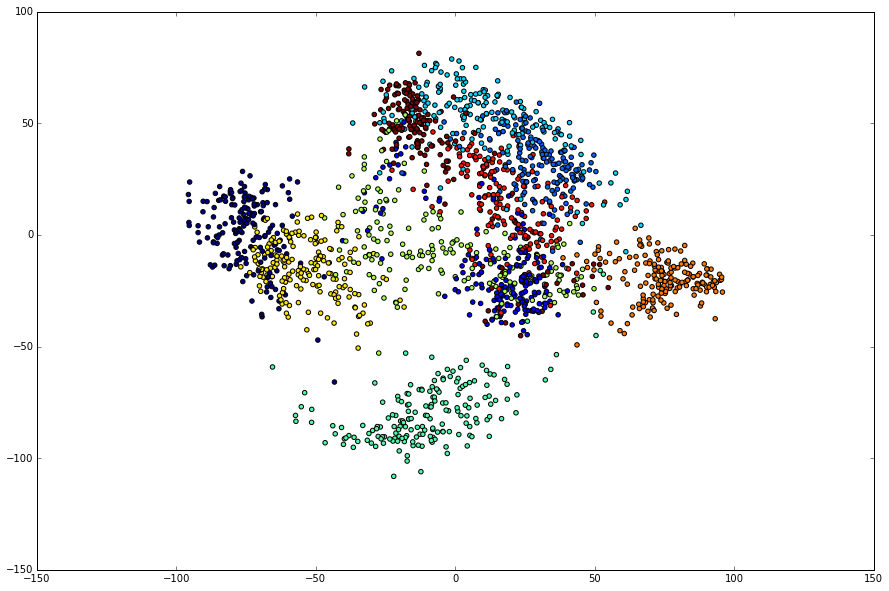

In [77]:
plt.figure(1, figsize=(15,10))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y);
# note tighter clustering of "digits"